<center>
    <h2> CHƯƠNG 3 - PHẦN 03: NAIVE BAYES VÀ BÀI TOÁN NLP</h2>
</center>

---
**NỘI DUNG BÀI HỌC:**
1. NLP và bài toán phân lớp văn bản
2. Thuật toán Naïve bayes
3. Phân loại comment trên twitter
4. Bài tập Thực hành
---
Copyright @dangvannam - FIT.HUMG @2024

## 1. NLP và bài toán phân lớp văn bản
---
* Xử lý ngôn ngữ tự nhiên – NLP (Natural Language Processing) là một trong những lĩnh vực quan trọng của trí tuệ nhân tạo. Rất nhiều ứng dụng của NLP đã, đang và ngày càng có ảnh hưởng sâu rộng tới mọi mặt của đời sống con người
* NLP là một lĩnh vực khoa học máy tính, kỹ thuật thông tin và trí tuệ nhân tạo tập trung vào nghiên cứu các tương tác về mặt ngôn ngữ giữa máy tính và con người, cụ thể hơn là làm thế nào để lập trình cho máy tính xử lý và phân tích một lượng lớn dữ liệu ngôn ngữ tự nhiên.
* Một số ứng dụng quan trọng của NLP:
    1. Các hệ thống máy dịch; 
    2. Ứng dụng trong xử lý văn bản và ngôn ngữ; 
    3. Ứng dụng trong tóm tắt và phân loại văn bản, 
    4. Hệ thống chatbot; trợ lý ảo.
    5. Tổng đài tự động (ACC)…. 
* Trong các ứng dụng của NLP, bài toán phân lớp văn bản là một trong những bài toán quan trọng và kinh điển nhất. 
* Mục tiêu của một hệ thống phân lớp văn bản là nó có thể tự động phân lớp một văn bản cho trước, để xác định xem văn bản đó thuộc lớp nào. 
* Các ứng dụng của phân lớp văn bản rất đa dạng như: Hiểu được ý nghĩa, đánh giá, bình luận của người dùng; Lọc email rác; Phân tích cảm xúc; Phân lớp tin tức các bài báo điện tử…


## 2.THUẬT TOÁN NAIVE BAYES
---
* Naive Bayes Classifiers (NBC)  là một trong những thuật toán tiêu biểu cho bài toán phân lớp dựa trên lý thuyết xác suất áp dụng định lý Bayes. 

* Định lý Bayes cho phép chúng ta có thể tính toán một xác suất chưa biết dựa vào các xác suất có điều kiện khác. Với công thức tổng quát tính xác suất của biến cố A với điều kiện biến cố Bk xảy ra trước (hay được gọi là xác suất hậu nghiệm):

<img src='pic/naivebayes.png'>

Trong công thức Naïve Bayes, Giả thiết các chiều dữ liệu là độc lập với nhau

Có 3 loại phân bố xác suất phổ biến là: 
1. Gausian naïve bayes: sử dụng chủ yếu trong loại dữ liệu mà các thành phần là các biến liên tục. Với mỗi chiều dữ liệu I và một nhãn c, xi tuân theo một phân phối chuẩn có kỳ vọng  μ và phương sai σ

2. multinomial naïve bayes: Mô hình này được sử dụng chủ yếu bài toán phân loại văn bản và vector đặc trưng được xây dựng dựa trên ý tưởng Bag of Words (BoW)!

3. Bernoulli naïve bayes: Mô hình này được áp dụng cho các loại dữ liệu mà mỗi thành phần là một giá trị nhị phân (0|1).

<img src='Pic/type.jpg' width='600px'>


## 3. Phân loại Comment độc (TOXIC)  - không độc (NON TOXIC) sử dụng thuật toán Naive Bayes

---
Xử lý ngôn ngữ tự nhiên (natural language processing - NLP) là một nhánh của trí tuệ nhân tạo tập trung vào các ứng dụng trên ngôn ngữ của con người. Trong trí tuệ nhân tạo thì xử lý ngôn ngữ tự nhiên là một trong những phần khó nhất vì nó liên quan đến việc phải hiểu ý nghĩa ngôn ngữ-công cụ hoàn hảo nhất của tư duy và giao tiếp. (wikipedia)

<img src='Pic/Picture1.jpg'>

Tập dữ liệu bao gồm 56700 comment với 2 thuộc tính (class, tweet),


1.   Class cho biết comment này thuộc lớp nào:
    *   0 : Không độc - Non Toxic
    *   1 : Độc - Toxic 
2. Tweet tập hợp các commnet, dữ liệu này chưa được xử lý.


**CÁC VẤN ĐỀ GIẢI QUYẾT TRONG PROJECT:**
* Nghiên cứu các phương pháp tiền xử lý dữ liệu văn bản
* Nghiên cứu các phương pháp trích chọn đặc trưng của dữ liệu văn bản
* Nghiên cứu sử dụng các thuật toán học máy phân lớp văn bản (Toxic - Non Toxic)

<img src='Pic/Picture2.png'>

### 3.1. TẢI TẬP DỮ LIỆU DATA_NLP VÀ QUAN SÁT TẬP DỮ LIỆU
---


In [1]:
#Gọi các thư viện:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Đọc file dữ liệu Data_NLP.csv vào biến data
data = pd.read_csv('Data/Data_NLP.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   56700 non-null  int64 
 1   tweet   56700 non-null  object
dtypes: int64(1), object(1)
memory usage: 886.1+ KB


In [3]:
#Hiển thị 5 dòng đầu tiên
data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
#Hiển thị 5 dòng cuối cùng
data.tail()

,class,tweet
56695,1,i couldn't end #2016 without mentioning #trump...
56696,0,#chateaubriand #stovells absolutely lovely #fo...
56697,0,@user #frarou woohoo! #euro2016 kicks off..!
56698,0,and here i thought @user and i were having a ...
56699,0,happy tuesday!! feeling fantastic today. looki...


In [5]:
#Hiển thị nội dung một comment bất kỳ
print(data.loc[[56600],['tweet']].values)

[["@user 'an unappetizing scam' :-) | women, we need to throw off the  shackles of #salad | #food #foodie |â\x80¦ "]]


**Kiểm tra dữ liệu thiếu, dữ liệu trùng lặp:**
---

In [6]:
#Kiểm tra dữ liệu missing trong tập: 
data.isnull().sum()# KHông có dữ liệu missing

class    0
tweet    0
dtype: int64

In [7]:
#Kiểm tra dữ liệu trùng lặp:
data.duplicated().sum() # Trong tập dữ liệu có 2429 câu comment bị lặp lại 

2429

In [8]:
#Liệt kê các bản ghi trùng lặp
data[data.duplicated()==True].sort_values(by='tweet')

,class,tweet
37332,0,#fathersday ! looking for something to do? s...
56547,0,#fathersday ! looking for something to do? s...
52183,0,#fathersday ! looking for something to do? s...
47075,0,#fathersday ! looking for something to do? s...
55171,0,#friday! we look forward to a wonderful week...
...,...,...
48366,0,ð #tech 10 symptoms of having a paner obs...
50083,0,ð #tech how bitcoin will revolutionise ga...
34745,0,ðquote of the day ð #bless #thankful #o...
28937,0,ðquote of the day ð #bless #thankful #o...


In [9]:
#Xóa các dữ liệu trùng lặp giữ lại bản ghi đầu tiên:
data.drop_duplicates(keep='first',inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54271 entries, 0 to 56699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   54271 non-null  int64 
 1   tweet   54271 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


### 3.2.TIỀN XỬ LÝ DỮ LIỆU VĂN BẢN
---

Sử dụng thư viện Natural Language Tool Kit (NLTK) thực hiện xử lý các comment

NLTK là một bộ công cụ dành riêng cho Natural Language Processing và được tích hợp vào Python. Nó đang ngày càng hoàn thiện và tích hợp các công cụ mới bởi hàng nghìn lập trình viên và cộng tác viên trên khắp thế giới. NLTK bao gồm những thư viện hàm, các công cụ phân tích, các corpus, wordnet, …giúp đơn giản hóa, tiết kiệm thời gian và công sức cho các lập trình viên. Python kết hợp với NLTK là bộ công cụ hữu hiệu và mạnh mẽ nhất dành cho Natural Language Processing.

http://www.nltk.org/


In [10]:
#Khai báo sử dụng thư viện NLTK
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

print(nltk.__version__)

3.7


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\songn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\songn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\songn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 3.3.1) Làm sạch dữ liệu
----
Mục đích bước này là loại bỏ noise trong data của bạn. Đa phần noise là các thẻ HTML, JavaScript, và đương nhiên nếu cứ để noise để tiến hành xử lý sẽ dẫn đến kết quả xử lý không tốt.

Thư viện re — Regular expression operations: thao tác với biểu thức chính quy

https://regex101.com/

In [11]:
#Thư viện re — Regular expression operations: thao tác với biểu thức chính quy
import re

#hàm decontracted thực hiện chuyển đổi các phần viết tắt thành câu đầy đủ
def decontracted(st):
    # specific
    st = re.sub(r"won\'t", "will not", st)
    st = re.sub(r"can\'t", "can not", st)
    # general
    st = re.sub(r"n\'t", " not", st)
    st = re.sub(r"\'re", " are", st)
    st = re.sub(r"\'s", " is", st)
    st = re.sub(r"\'d", " would", st)
    st = re.sub(r"\'ll", " will", st)
    st = re.sub(r"\'ve", " have", st)
    st = re.sub(r"\'m", " am", st)
    return st

In [12]:
#Kiểm tra decontracted:
text=""""SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That's the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com"""

print("Dữ liệu ban đầu: \n", text)
print('-----------------------------------------------')

text1 = decontracted(text)
print("Dữ liệu sau khi xử lý: \n", text1)

Dữ liệu ban đầu: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That's the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com
-----------------------------------------------
Dữ liệu sau khi xử lý: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That is the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I am looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com


In [13]:
 #hàm clear_link thực hiện loại bỏ liên kết (link), địa chỉ email trong câu
def clear_link(st):
    #Remove links/email
    word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', 
                '', st, flags=re.MULTILINE)
    word = re.sub(r'(@[^\s]*)', "", word)
    #word = re.sub('[\W]', ' ', st)
    return word

In [14]:
#Kiểm tra clear_link:
print("Dữ liệu ban đầu: \n", text)
print('-----------------------------------------------')

text1 = clear_link(text)
print("Dữ liệu sau khi xử lý: \n", text1)

Dữ liệu ban đầu: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That's the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com
-----------------------------------------------
Dữ liệu sau khi xử lý: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That's the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
; 


In [15]:
#Hàm clear_punctuation thực hiện loai bỏ các dấu câu, ký tự đặc biệt trong chuỗi
def clear_punctuation(st):
    word = re.sub(r'[^\w\s]', '',st)
    return word

In [16]:
#Kiểm tra clear_punctuation:
print("Dữ liệu ban đầu: \n", text)
print('-----------------------------------------------')

text1 = clear_punctuation(text)
print("Dữ liệu sau khi xử lý: \n", text1)

Dữ liệu ban đầu: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That's the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com
-----------------------------------------------
Dữ liệu sau khi xử lý: 
 SORRY JB FAN 65292REALLY JUSTIN COME BACK 
Thats the top comment on a Justin Timberlake video with 10 million views 
Son of a fucking bitch Im looking forward this video Have you been seen it yet 
fanjustingmailcom httpsallflimcom


In [17]:
#Hàm clear_special loại bỏ các ký tự chỉ để lại các ký tự chữ a-z, A-Z
def clear_special(st):
    word = re.sub('[^a-zA-Z]', ' ', st)
    return word

In [18]:
#Kiểm tra clear_special:
print("Dữ liệu ban đầu: \n", text)
print('-----------------------------------------------')

text1 = clear_special(text)
print("Dữ liệu sau khi xử lý: \n", text1)

Dữ liệu ban đầu: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That's the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com
-----------------------------------------------
Dữ liệu sau khi xử lý: 
  SORRY JB FAN         REALLY JUSTIN COME BACK    That s the top comment on a Justin Timberlake video with    million views   Son of a fucking bitch  I m looking forward this video  Have you been seen it yet   fanjustin gmail com  https   allflim com


In [19]:
#Hàm clear_noise kết hợp sử dụng các hàm ở trên để xử lý chuỗi
def clear_noise(word):
    word = word.lower()         # chuyển toàn bộ sang chữ thường để xử lý
    word = decontracted(word)
    word = clear_link(word)
    word = clear_punctuation(word)
    word = clear_special(word)
    return word

In [20]:
#Kiểm tra clear_noise:
text=""""SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That is the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com"""

print("Dữ liệu ban đầu: \n", text)
print('-----------------------------------------------')
text1 = clear_noise(text)
print("Dữ liệu sau khi làm sạch: \n", clear_noise(text1))

Dữ liệu ban đầu: 
 "SORRY JB FAN &#65292;REALLY JUSTIN COME BACK". 
That is the top comment on a Justin Timberlake video with 10 million views. 
Son of a fucking bitch! I'm looking forward this video. Have you been seen it yet. 
fanjustin@gmail.com; https://allflim.com
-----------------------------------------------
Dữ liệu sau khi làm sạch: 
 sorry jb fan      really justin come back  that is the top comment on a justin timberlake video with    million views  son of a fucking bitch i am looking forward this video have you been seen it yet   


### 3.3.2) Loại bỏ stopword
---

StopWords là những từ xuất hiện nhiều trong ngôn ngữ tự nhiên, tuy nhiên lại không mang nhiều ý nghĩa. Ở tiếng việt StopWords là những từ như: để, này, kia... Tiếng anh là những từ như: is, that, this... Tham khảo thêm tại danh sách stopwords trong tiếng việt

Có rất nhiều cách để loại bỏ StopWords nhưng có 2 cách chính là:

* Dùng từ điển

* Dựa theo tần suất xuất hiện của từ

In [21]:
#stopwords là những từ xuất hiện nhiều trong văn bản, nhưng ko có ý nghĩa 
#Load danh sách Stopword trong tiếng anh

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\songn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#Hiển thị danh sách các stopwords trong tiếng anh
print('Hiển thị danh sách các stopwords trong tiếng anh:\n',stop)

Hiển thị danh sách các stopwords trong tiếng anh:
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', '

In [23]:
#hàm clear_stopwords lọai bỏ các từ stopword trong câu
def clear_stopwords(st):
    word = " ".join(st for st in st.split() if st not in stop)
    return word

In [24]:
print('Dữ liệu ban đầu: \n',text1)
print('-------------------------------------')
text2 = clear_stopwords(text1)
print('Dữ liệu loại bỏ stopwords:\n',text2)

Dữ liệu ban đầu: 
 sorry jb fan      really justin come back  that is the top comment on a justin timberlake video with    million views  son of a fucking bitch i am looking forward this video have you been seen it yet   
-------------------------------------
Dữ liệu loại bỏ stopwords:
 sorry jb fan really justin come back top comment justin timberlake video million views son fucking bitch looking forward video seen yet


### 3.3.3) Chuẩn hóa từ (Stemming và Lemmatization)
---
Trong quá trình xử lý ngôn ngữ tự nhiên, chúng ta sẽ có nhu cầu so sánh các từ (token) với nhau. Việc so sánh này tưởng chừng như đơn giản là lấy 2 chuỗi ký tự và dùng phép “==” để kiểm tra, nhưng thực tế thì không phải là như vậy. Đối với một số ngôn ngữ, tiêu biểu là tiếng Anh, mỗi từ có thể có nhiều biến thể khác nhau. Điều này làm cho việc so sánh giữa các từ là không thể mặc dù về mặc ý nghĩa cơ bản là như nhau. Ví dụ các từ “walks“, “walking“, “walked” đều là các biến thể của từ “walk” và đều mang ý nghĩa là “đi bộ”. Vậy làm sao để so sánh các từ như thế với nhau? Lemmatization và Stemming chính là 2 kỹ thuật thường được dùng cho việc này.

Stemming là kỹ thuật dùng để biến đổi 1 từ về dạng gốc (được gọi là stem hoặc root form) bằng cách cực kỳ đơn giản là loại bỏ 1 số ký tự nằm ở cuối từ mà nó nghĩ rằng là biến thể của từ. Ví dụ như chúng ta thấy các từ như walked, walking, walks chỉ khác nhau là ở những ký tự cuối cùng, bằng cách bỏ đi các hậu tố –ed, –ing hoặc –s, chúng ta sẽ được từ nguyên gốc là walk. Người ta gọi các bộ xử lý stemming là Stemmer.

Bởi vì nguyên tắc hoạt động của stemmer rất là đơn giản như vậy cho nên tốc độ xử lý của nó rất là nhanh, và kết quả stem đôi khi không được như chúng ta mong muốn. Chẳng hạn như từ goes sẽ được stem thành từ goe (bỏ chữ s cuối từ) trong khi đó stem của từ go vẫn là go, kết quả là 2 từ “goes” và “go” sau khi được stem thì vẫn không giống nhau. Một nhược điểm khác là nếu các từ dạng bất quy tắt như went hay spoke thì stemmer sẽ không thể đưa các từ này về dạng gốc là go hay speak.

Tuy có các nhược điểm như trên nhưng trong thực tế Stemming vẫn được sử dụng khá phổ biến trong NLP vì nó có tốc độ xử lý nhanh và kết quả cuối cùng nhìn chung không hề tệ khi so với Lemmatization.

In [25]:
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()
import string
my_sw = ['rt', 'ht', 'fb', 'amp', 'gt']

def black_txt(token):
    if token == 'u':
        token = 'you'
    return  token not in stop and token not in list(string.punctuation) and token not in my_sw


def fun_stemlem(word):
    list_word_clean = []
    for w1 in word.split(" "):
        if  black_txt(w1.lower()):
            word_lemma =  wn.lemmatize(w1,  pos="v")
            list_word_clean.append(word_lemma)

  #Cleaning, lowering and remove whitespaces
    word = " ".join(list_word_clean)
    return word 

In [26]:
# nltk.download('wordnet')

In [27]:
# nltk.download('omw-1.4')

In [28]:
print('Dữ liệu ban đầu: \n',text2)
print('-------------------------------------')
text3 = fun_stemlem(text2)
print('Dữ liệu sau khi đã chuẩn hóa:\n',text3)

Dữ liệu ban đầu: 
 sorry jb fan really justin come back top comment justin timberlake video million views son fucking bitch looking forward video seen yet
-------------------------------------
Dữ liệu sau khi đã chuẩn hóa:
 sorry jb fan really justin come back top comment justin timberlake video million view son fuck bitch look forward video see yet


In [29]:
#Ví dụ một comment trong data:
st1 = data.iloc[2000]['tweet']
st1

'&amp; my sister is really going to fucken deny it but yet sprays the room with febreeze , like really bitch why are you going to deny it'

In [30]:
print('1.----------Chuỗi ban đầu------------------------:\n ', st1)
sta = clear_noise(st1)
print('\n 2.----------Chuỗi loại bỏ nhiễu:-----------------:\n',sta)
stb = clear_stopwords(sta)
print('\n 3.----------Chuỗi loại bỏ stopwords--------------:\n',stb)
stc = fun_stemlem(stb)
print('\n 4.--Chuỗi loại xử lý Stemming và Lemmatization---:\n',stc)   

1.----------Chuỗi ban đầu------------------------:
  &amp; my sister is really going to fucken deny it but yet sprays the room with febreeze , like really bitch why are you going to deny it

 2.----------Chuỗi loại bỏ nhiễu:-----------------:
 amp my sister is really going to fucken deny it but yet sprays the room with febreeze  like really bitch why are you going to deny it

 3.----------Chuỗi loại bỏ stopwords--------------:
 amp sister really going fucken deny yet sprays room febreeze like really bitch going deny

 4.--Chuỗi loại xử lý Stemming và Lemmatization---:
 sister really go fucken deny yet spray room febreeze like really bitch go deny


### 3.3.4) Tiền Xử lý toàn bộ tập dữ liệu với các hàm đã xây dựng
---


In [31]:
#Xây dựng hàm prepare_data: để thực hiện tiền xử lý dữ liệu
def prepare_data(word):
    word = clear_noise(word)        #Loại bỏ nhiễu trong các comment
    word = clear_stopwords(word)    #Loại bỏ stopword trong các comment
    word = fun_stemlem(word)        #Chuẩn hóa comment
    return word

In [32]:
#Hiển thị danh sách các từ trước và sau khi tiền xử lý để test
for idx in data[6095:6100].index:
    print(idx, 
        '\n a.Dữ liệu gốc          :', data.iloc[idx]['tweet'],
        '\n b.Dữ liệu sau chuẩn hóa:',prepare_data(data.iloc[idx]['tweet']))
    print("************")

6095 
 a.Dữ liệu gốc          : @hidalgoparadise lol its #hoe bitch ass 
 b.Dữ liệu sau chuẩn hóa: lol hoe bitch ass
************
6096 
 a.Dữ liệu gốc          : @hiyathanda_alps "that hoe over there" 
 b.Dữ liệu sau chuẩn hóa: hoe
************
6097 
 a.Dữ liệu gốc          : @hmianturner boooooi that's TMI for these hoes 
 b.Dữ liệu sau chuẩn hóa: boooooi tmi hoe
************
6098 
 a.Dữ liệu gốc          : @hoes &#9829; 
 b.Dữ liệu sau chuẩn hóa: 
************
6099 
 a.Dữ liệu gốc          : @holmes0786 only if its yellow cake &amp; chocolate frosting 
 b.Dữ liệu sau chuẩn hóa: yellow cake chocolate frost
************


In [33]:
#Tạo dataframe data_new, bổ sung thêm field: tweet_ok là comment đã được tiền xử lý dữ liệu tương ứng
data_new = data.copy()
data_new['tweet_ok'] = data['tweet'].apply(lambda x: prepare_data(x))

In [34]:
data_new.head(10)

,class,tweet,tweet_ok
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean house man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch tell ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit blow faithful somebody still fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",sit hate another bitch get much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause tire big bitch come us skinny girls
8,1,""" &amp; you might not get ya bitch back &amp; ...",might get ya bitch back thats
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fight mariam bitch


### lọc và loại bỏ một số comment rỗng sau chuẩn hóa:
---
Sau khi thực hiện tiền xử lý, một số comment chỉ còn lại xâu rỗng, cần loại bỏ những xâu này


In [35]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54271 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     54271 non-null  int64 
 1   tweet     54271 non-null  object
 2   tweet_ok  54271 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
#Lọc những comment sau khi xử lý chỉ còn là khoảng trắng
print('Tổng số:',data_new['tweet_ok'].loc[data_new.tweet_ok==r''].count())
data_new.loc[data_new.tweet_ok==r'']

Tổng số: 43


,class,tweet,tweet_ok
2637,1,@BloodOfJupiter yeah...bitch!,
4828,0,@TNKidsFoodPorn @Oreo ..............&#128530;,
6098,1,@hoes &#9829;,
6613,1,@maccabeez thanks...bitch.,
25441,0,..feeling so #lonely..and ..,
26744,0,@user same ððð,
28134,0,what i doð,
28765,0,@user then why are you,
29194,0,no 1 is up,
29582,0,@user @user @user @user @user @user @user @us...,


In [37]:
#Chỉ lấy các bản ghi có dữ liệu:
data_ok = data_new.loc[data_new.tweet_ok!=r'']
data_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54228 entries, 0 to 56699
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     54228 non-null  int64 
 1   tweet     54228 non-null  object
 2   tweet_ok  54228 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### 3.3.5 Kiểm tra mức độ cân bằng của tập dữ liệu:
---

In [38]:
#Kiểm tra mức độ cân bằng của tập dữ liệu
print('Thông kê tập dữ liệu:')
print(data_ok.count())
print('-----------------------------------')
print('Thông kê số lượng comment theo lớp:')
x = data_ok['class'].value_counts()
print(x)

Thông kê tập dữ liệu:
class       54228
tweet       54228
tweet_ok    54228
dtype: int64
-----------------------------------
Thông kê số lượng comment theo lớp:
0    31609
1    22619
Name: class, dtype: int64


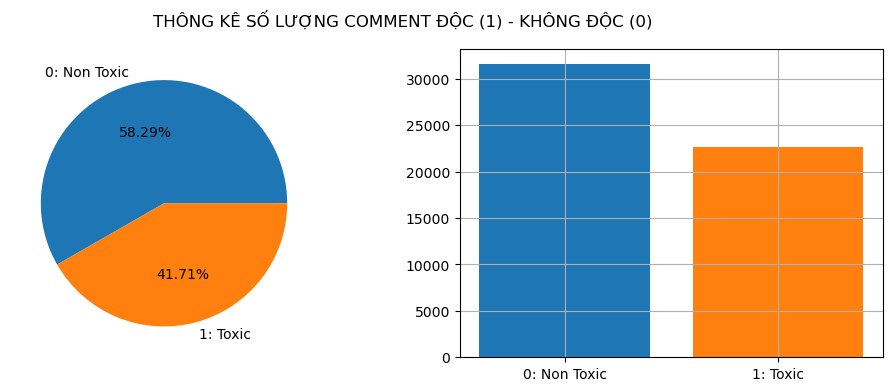

In [39]:
#Trực quan hóa số liệu
import matplotlib.pyplot as plt
label = ['0: Non Toxic', '1: Toxic']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.suptitle('THÔNG KÊ SỐ LƯỢNG COMMENT ĐỘC (1) - KHÔNG ĐỘC (0)')
plt.pie(x, labels=label, 
        autopct='%.2f%%', colors=['#1E77B4','#FF7F0F'])

plt.subplot(1,2,2)
plt.bar(label,x, color=['#1E77B4','#FF7F0F'])
plt.grid(True)
plt.show()

### 3.3.6) Lưu kết quả đã xử lý ra file
---

Lưu dữ liệu đã xử lý ra file:
* File: data_all.csv (class - tweet - tweet_ok)
* File: data_finish.csv (class - tweet)

In [40]:
data_ok.head()

,class,tweet,tweet_ok
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean house man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch tell ya


In [41]:
#Lưu kết quả sau khi đã xử lý ra file .csv
#File Data_all.csv Lưu trữ 3 thuộc tính: class - tweet (gốc) - tweet_ok (đã xử lý)
data_ok.to_csv('Data/Data_all.csv',index=None, header=True)

#File Data_finish.csv chỉ lưu trữ 2 thuộc tính: class - tweet_ok (đã xử lý)
data_ok[['class','tweet_ok']].to_csv('Data/Data_finish.csv',index=None, header=True)

### 3.3.7) Phân tách Biến độc - Biến phụ thuộc
---
* Biến độc lập X: Thuộc tính tweet_ok (nội dung comment sau khi đã được xử lý)
* Biến phụ thuộc y: class (cho biết comment đó là Toxic - Non toxic)

In [42]:
#Tải file dữ liệu sau khi đã tiền xử lý
import pandas as pd
data_finish = pd.read_csv('Data/data_finish.csv')
data_finish.head(10)

,class,tweet_ok
0,0,woman complain clean house man always take trash
1,1,boy dats dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confuse shit
3,1,look like tranny
4,1,shit hear might true might faker bitch tell ya
5,1,shit blow faithful somebody still fuck hoe
6,1,sit hate another bitch get much shit go
7,1,cause tire big bitch come us skinny girls
8,1,might get ya bitch back thats
9,1,hobbies include fight mariam bitch


In [43]:
#Biến độc lập X:
X = data_finish.loc[:,'tweet_ok']
X

0         woman complain clean house man always take trash
1                 boy dats dwn bad cuffin dat hoe st place
2              dawg ever fuck bitch start cry confuse shit
3                                         look like tranny
4           shit hear might true might faker bitch tell ya
                               ...                        
54223    could end without mention trump feminism photo...
54224    chateaubriand stovells absolutely lovely food yum
54225                              frarou woohoo euro kick
54226    think lovely conversation guess debate people ...
54227    happy tuesday feel fantastic today look forwar...
Name: tweet_ok, Length: 54228, dtype: object

In [44]:
#Biến phụ thuộc y:
y = data_finish.loc[:,'class']
y

0        0
1        1
2        1
3        1
4        1
        ..
54223    1
54224    0
54225    0
54226    0
54227    0
Name: class, Length: 54228, dtype: int64

### 3.3.8) Tách dữ liệu thành tập Train - Test
---
* Tập Train (80%) sử dụng để huấn luyện model
* Tập Test (20%) sử dụng để kiểm thử độ chính xác của modoe


In [45]:
from sklearn.model_selection import train_test_split
#Tách tập dữ liệu thành Train - Test (tỷ lệ: 0.8 - 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 shuffle=True, #  đảo lẫn các dòng
                                                 random_state=42)
print('1.Tập ban đầu:',data_finish.shape)
print('-------------------------------')
print('a.Tập Train: ', X_train.shape)
print('b.Tập Test: ', y_test.shape)

1.Tập ban đầu: (54228, 2)
-------------------------------
a.Tập Train:  (43382,)
b.Tập Test:  (10846,)


In [46]:
X_train

29343    today society guy think reason girls friends d...
38442                          ask sta like transpoed back
49655                wonder next book series bestbooksever
13040    hair one kind dont ever fix mouth say hair ali...
21488    guy get excite saw oreo cookie crust think mak...
                               ...                        
11284                             gonna hoe shit meet wait
44732    udtapunjab today paper bjp one defamingpunjab ...
38158    chick fil hear boy say let pretend terrorist a...
860      pornandroidiphoneipadsexxxx anal hardcore brit...
15795    media matter executive behind stoprush campaig...
Name: tweet_ok, Length: 43382, dtype: object

## 4) Embedding TẬP DỮ LIỆU ĐÃ XỬ LÝ
---
Khi huấn luyện mô hình máy học để xử lý ngôn ngữ tự nhiên, thì chắc chắn dữ liệu bạn có ở dạng chữ viết, sự thật là bạn không thể đem trực tiếp dữ liệu chữ viết thô vào để huấn luyện mô hình máy học ngay được, bởi vì các mô hình máy học chỉ làm việc được trên những con số, hay chính xác hơn là tính toán trên các ma trận, véc-tơ số.

Điều này dẫn đến việc bạn phải nghĩ cách làm thế nào đó để chuyển dữ liệu chữ viết thô thành dữ liệu số thực, sau đó mới có thể đưa dữ liệu số thực này vào các mô hình học được, có rất nhiều kĩ thuật để làm việc này và gọi chung chúng là kĩ thuật Embedding.

Đó chỉ mới là ý tưởng của kĩ thuật Embedding, còn việc chuyển từ không gian này sang một không gian vec-tơ khác bạn không thể làm tùy tiện được mà phải đảm bảo:

* Không gian véc-tơ mới (hay véc-tơ số thực) phải thể hiện được bản chất của tập dữ liệu ban đầu (dữ liệu chữ viết).
* Cực tiểu hóa lượng mất mát thông tin xảy ra khi bạn chuyển sang không gian mới.

Một số kĩ thuật Embedding được sử dụng phổ biến như mạng Neural Network, PCA (Principal Component Analysis) gọi là kĩ thuật phân tích thành phần chính, TF-IDF, Bag of Word, Encoder-Decoder sử dụng trong RNN (Recurrent Neural Network) hoặc LSTM (Long-Short Term Memory), ...v.v.

Một số thư viện sử dụng kĩ thuật Embedding như sklearn, Word2vec, FastText, ...v.v.

### 4.1) TF-IDF
----
Viết tắt của thuật ngữ tiếng Anh term frequency – inverse document frequency,tf-idf là trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.

**Các tính trọng số TF-IDF:**
* Tf- term frequency : dùng để ước lượng tần xuất xuất hiện của từ trong văn bản. Tuy nhiên với mỗi văn bản thì có độ dài khác nhau, vì thế số lần xuất hiện của từ có thể nhiều hơn . Vì vậy số lần xuất hiện của từ sẽ được chia độ dài của văn bản (tổng số từ trong văn bản đó)

    * TF(t, d) = (số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)

* IDF- Inverse Document Frequency: dùng để ước lượng mức độ quan trọng của từ đó như thế nào . Khi tính tần số xuất hiện tf thì các từ đều được coi là quan trọng như nhau. Tuy nhiên có một số từ thường được được sử dụng nhiều nhưng không quan trọng để thể hiện ý nghĩa của đoạn văn. Vì vậy ta cần giảm đi mức độ quan trọng của những từ đó bằng cách sử dụng IDF :

    * IDF(t, D) = log_e( Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t )


In [47]:
#Ví dụ chuyển đổi 
'''st = ['Công cha như núi thái sơn',
     'Nghĩa mẹ như nước trong nguồn chảy ra',
     'Một lòng thờ mẹ kính cha',
     'Cho tròn chữ hiếu mới là đạo con']'''

st = ['Cục ta cục tác',
      'Gà mẹ tìm mồi',
      'Sáng sớm tinh mơ',
      'Đến khi choạng tối']

In [48]:
# Tính TF-IDF cho tập dữ liệu
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text

vec = TfidfVectorizer(lowercase=True)
st_tfidf = vec.fit_transform(st)

print(st_tfidf.shape)

(4, 15)


In [49]:
#Dữ liệu sau khi chuyển đổi ở dạng ma trận thưa, 
#mỗi hàng tương ứng với 1 câu
#Mỗi cột tương ứng với trọng số của một từ trong câu, 
#từ nào không có trong câu đó, trọng số = 0
st_tfidf

<4x15 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [50]:
print(st_tfidf)

  (0, 11)	0.408248290463863
  (0, 9)	0.408248290463863
  (0, 1)	0.816496580927726
  (1, 6)	0.5
  (1, 12)	0.5
  (1, 5)	0.5
  (1, 2)	0.5
  (2, 4)	0.5
  (2, 10)	0.5
  (2, 8)	0.5
  (2, 7)	0.5
  (3, 13)	0.5
  (3, 0)	0.5
  (3, 3)	0.5
  (3, 14)	0.5


In [51]:
#Liệt kê danh sách các từ khác nhau, vị trí trong cột
vec.vocabulary_

{'cục': 1,
 'ta': 9,
 'tác': 11,
 'gà': 2,
 'mẹ': 5,
 'tìm': 12,
 'mồi': 6,
 'sáng': 7,
 'sớm': 8,
 'tinh': 10,
 'mơ': 4,
 'đến': 14,
 'khi': 3,
 'choạng': 0,
 'tối': 13}

In [52]:
#Áp dụng cho tập dữ liệu comment:
vector = TfidfVectorizer()

vector.fit(data_finish['tweet_ok'])

#Chuyển đổi tập Train - Test ra số:
X_train_tfidf = vector.transform(X_train)
X_test_tfidf = vector.transform(X_test)

In [53]:
#Dữ liệu sau khi chuyển sang số với TF-IDF:
print('1.Train:',X_train_tfidf.shape)
print('2.Test:',X_test_tfidf.shape)

1.Train: (43382, 45260)
2.Test: (10846, 45260)


In [54]:
#(train_x[1])
print(X_train.iloc[20])
print(X_train_tfidf[20].data)
print(X_train_tfidf[20].data.shape)

gbpusd strong resistance lie around commerzbank blog silver gold forex
[0.29020133 0.26214936 0.40105741 0.27564524 0.25925614 0.39449168
 0.26907952 0.43058055 0.25278133 0.25630906]
(10,)


## 4.2. MACHINE LEARNING CHO PHÂN LỚP VĂN BẢN
---


### Thuật toán Naive Bayes
---
* Naive Bayes Classifiers (NBC) thường được sử dụng trong các bài toán Text Classification
* NBC có thời gian training và test rất nhanh. Điều này có được là do giả sử về tính độc lập giữa các thành phần, nếu biết class.

* Nếu giả sử về tính độc lập được thoả mãn (dựa vào bản chất của dữ liệu), NBC được cho là cho kết quả tốt hơn so với SVM và logistic regression khi có ít dữ liệu training.

* NBC có thể hoạt động với các feature vector mà một phần là liên tục (sử dụng Gaussian Naive Bayes), phần còn lại ở dạng rời rạc (sử dụng Multinomial hoặc Bernoulli).

* Khi sử dụng Multinomial Naive Bayes, Laplace smoothing thường được sử dụng để tránh trường hợp 1 thành phần trong test data chưa xuất hiện ở training data.


#### Sử dụng MultinomialNB


In [55]:
#Sử dụng mô hình Naive Bayes với TF-IDF
from sklearn import naive_bayes

#Khai báo sử dụng model Multinomial Naive bayes:
MultiNB = naive_bayes.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(X_train_tfidf,y_train)

#Danh sách các tham số của model:
MultiNB.get_params()

{'alpha': 0.75, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

**Các tham số của thuật toán Naive Bayes:**
1. Naive Bayes trong Sklearn: https://scikit-learn.org/stable/modules/naive_bayes.html#
2. Các tham số cho Multinomial Naive Bayes: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

* **alpha:** float, default=1.0;
Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

* **fit_prior:** bool, default=True;
Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

* **class_prior:** array-like of shape (n_classes,), default=None;
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

In [56]:
#Đánh giá độ chính xác của mô hình trên tập huấn luyện
acc_MultiNB = round(MultiNB.score(X_train_tfidf, y_train) * 100, 2)

print('Độ chính xác của mô hình trên tập huấn luyện: ', acc_MultiNB, '%')

Độ chính xác của mô hình trên tập huấn luyện:  94.62 %


**Đánh giá trên tập kiểm thử:**

---

In [57]:
from sklearn.metrics import accuracy_score
#Dự đoán và tính đoán độ chính xác của model trên tập Test:
y_pred = MultiNB.predict(X_test_tfidf)

acc1 = round(accuracy_score(y_test, y_pred)*100, 2)
print('1.Độ chính xác của mô hình trên tập Test: ', acc1, '%')

acc2 = accuracy_score(y_test, y_pred, normalize=False)
print('2.Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))
print('3.Tổng số mẫu dự đoán sai:', len(y_test) - acc2, ' /', len(y_test))

1.Độ chính xác của mô hình trên tập Test:  90.33 %
2.Tổng số mẫu dự đoán đúng: 9797  / 10846
3.Tổng số mẫu dự đoán sai: 1049  / 10846


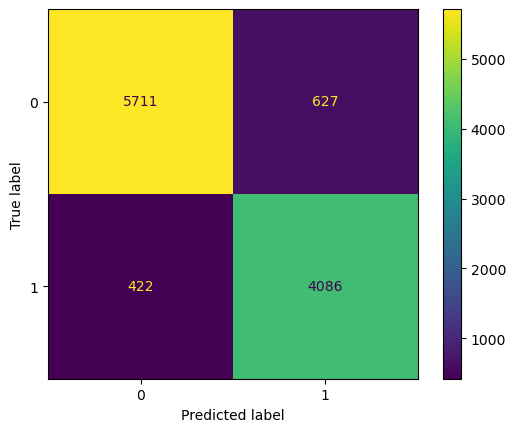

In [58]:
#Hiển thị confusion matrix:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Hiển thị dạng số:
cm = confusion_matrix(y_test, y_pred, labels=MultiNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MultiNB.classes_)
disp.plot()
plt.show()

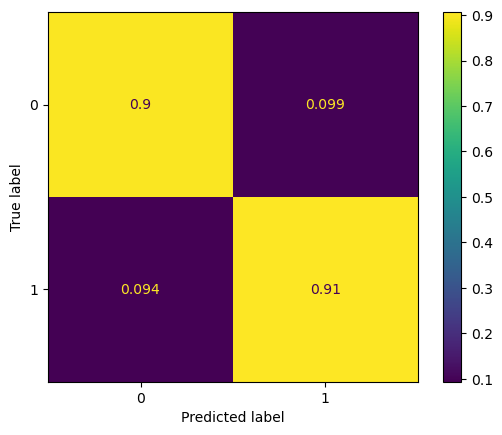

In [59]:
#Hiển thị dạng tỷ lệ %:
cm1 = confusion_matrix(y_test, y_pred, labels=MultiNB.classes_, normalize='true')
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=MultiNB.classes_)
disp1.plot()
plt.show()

### Áp dụng model:
---
Ví dụ với một comment mới --> Sử dụng model đã huấn luyện để cho biết comment này là độc (1) hay không độc (0)
giả sử model đúng với trạng thái bestfit

In [60]:
#Khai báo 1 comment mới:
st_new = '@thanhhoa you are very handsome, i love you so much! DangVanNam@gmail.com'
print('Câu Comment:',st_new)

Câu Comment: @thanhhoa you are very handsome, i love you so much! DangVanNam@gmail.com


In [61]:
st_new1 = 'you look like a dog, i hate you'


In [62]:
#Tiền xử lý và chuẩn hóa comment:
st_new_process = prepare_data(st_new)
print('Dữ liệu sau khi xử lý: ', st_new_process)

Dữ liệu sau khi xử lý:  handsome love much


In [63]:
#Chuyển về số với TFIDF:
st_new_tfidf = vector.transform([st_new_process])
print(st_new_tfidf)
print(st_new_tfidf.shape)

  (0, 26239)	0.5086256152237204
  (0, 23394)	0.3563880255958183
  (0, 16957)	0.7837649894899658
(1, 45260)


In [64]:
#Dự đoán với model Naive Bayes:
st_pred = MultiNB.predict(st_new_tfidf)
print(st_pred)
if(st_pred == 0):
    print('ML said: this comment is non toxic!')
else:
    print('ML said: this comment is toxic')

[0]
ML said: this comment is non toxic!


In [65]:
st_pred = MultiNB.predict(st_new_tfidf)
print(st_pred)
if(st_pred == 0):
    print('ML said: this comment is non toxic!')
else:
    print('ML said: this comment is toxic')

[0]
ML said: this comment is non toxic!


### THỰC HÀNH1: Áp dụng với thuật toán KNN
---
Sinh viên áp dụng thuật toán KNN đã học cho Bài toán phần lớp văn bản. Đánh giá độ chính xác

In [66]:
#Sử dụng KNN:


### THỰC HÀNH 2: Áp dụng với thuật toán Cây quyết định
---

Sinh viên áp dụng thuật toán Cây quyết định cho bài toán phân lớp văn bản và đánh giá độ chính xác

In [67]:
df_comment = 

SyntaxError: invalid syntax (3999488757.py, line 1)